<a href="https://colab.research.google.com/github/abhivadali13/titanic-ML/blob/main/titanic_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this program seeks to predict if a passenger will survive on the titanic or not
#this is a solution to the kaggle competition: "titanic-machine learning from disaster"

In [1]:
#importing necessary libraries
%matplotlib inline
import os

import math, time, random, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno
sns.set_theme(style="whitegrid")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing drive and mounting it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#cd'ing into the folder that has the datasets required for this project
%cd "/content/drive/My Drive/Kaggle/titanic"

/content/drive/My Drive/Kaggle/titanic


In [4]:
#loading the titanic dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
#displaying the training data
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#moving the 'Survived' column to the far right of the dataframe (for clarity)
df_temp = df_train.pop('Survived')
df_train['Survived'] = df_temp

#displaying the training data
df_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [7]:
#displaying the test data
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
#displaying the example submission data
df_gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [9]:
#checking statistics of the training dataset
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
#checking the number of missing values in the training dataset
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [11]:
#creating two new dataframes, one for discretized continuous variables, and another for continuous variables
df_bin = pd.DataFrame()
df_cont = pd.DataFrame()

In [12]:
#checking the datatypes of all the columns in the dataframe
df_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [13]:
#will be now going feature by feature to analyze and visualize the data, in the order of, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

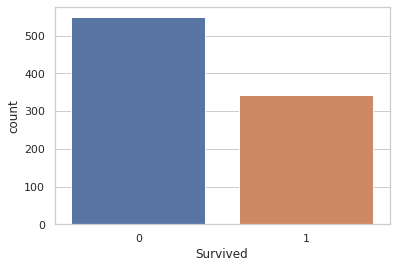

In [14]:
#visualizing the number of survivors on the titanic
ax = sns.countplot(x = df_train['Survived'], data = df_train)

In [15]:
#counting the number of people that survived on the titanic
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
#adding the Survived column to the subset dataframes
df_bin['Survived'] = df_train['Survived']
df_cont['Survived'] = df_train['Survived']

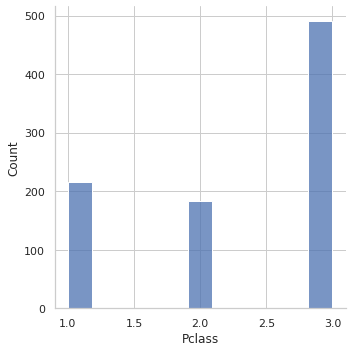

In [17]:
#visualizing the distribution of the number of people in each Pclass on the titanic
ax = sns.displot(data = df_train.Pclass)

In [18]:
#counting the number of people in each Pclass on the titanic
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
#adding the Pclass column to the subset dataframes
df_bin['Pclass'] = df_train['Pclass']
df_cont['Pclass'] = df_train['Pclass']

In [20]:
#counting the number of different Names people on the Titanic have
df_train.Name.value_counts()

Osman, Mrs. Mara                                   1
Farrell, Mr. James                                 1
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)    1
Bing, Mr. Lee                                      1
Holverson, Mr. Alexander Oskar                     1
                                                  ..
Gillespie, Mr. William Henry                       1
Landergren, Miss. Aurora Adelia                    1
Turkula, Mrs. (Hedwig)                             1
Mineff, Mr. Ivan                                   1
Klaber, Mr. Herman                                 1
Name: Name, Length: 891, dtype: int64

In [21]:
#the Name column will not be used because it does not add any relevant information: the passenger id is already a unique identifier for each passenger on the Titanic

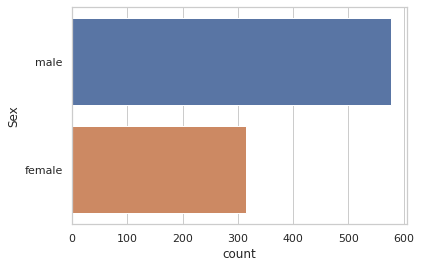

In [22]:
#visualizing the number of people in each Sex on the titanic
ax = sns.countplot(y = df_train['Sex'], data = df_train)

In [23]:
#counting the number of different people in each Sex on the titanic
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
#adding the Sex column to the subset dataframes
df_bin['Sex'] = df_train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) #where the value is 'female' converting it to 1, and where it isn't, converting it to 0
df_cont['Sex'] = df_train['Sex']

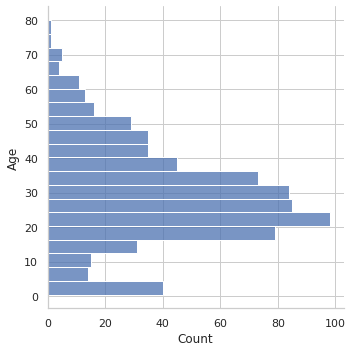

In [25]:
#visualizing the number of people in each Age on the titanic
ax = sns.displot(y = df_train['Age'], data = df_train)

In [26]:
#recall, there are over a hundred missing values in the Age column
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [27]:
#we decide to fill the two missing Age values with the median Age
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [28]:
#we ensure that Age no longer has any missing values
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [29]:
#adding the Age column to the subset dataframes
df_bin['Age'] = df_train['Age']
df_cont['Age'] = df_train['Age']

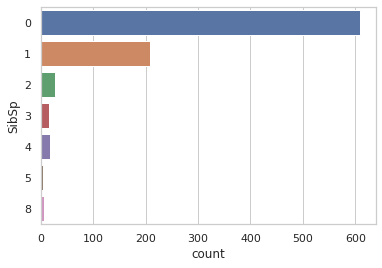

In [30]:
#visualizing the number of SibSp (siblings/spouses) each passenger on the titanic has
ax = sns.countplot(y = df_train['SibSp'], data = df_train)

In [31]:
#counting the number of people with different SibSp values on the titanic
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
#adding the Sex column to the subset dataframes
df_bin['SibSp'] = df_train['SibSp']
df_cont['SibSp'] = df_train['SibSp']

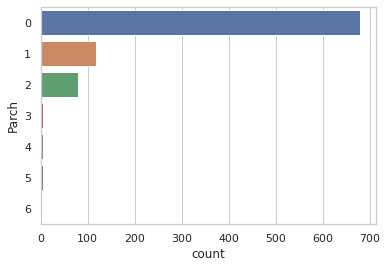

In [33]:
#visualizing the number of Parch (parents/children) each passenger on the titanic has
ax = sns.countplot(y = df_train['Parch'], data = df_train)

In [34]:
#counting the number of people with different Parch values on the titanic
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
#adding the Parch column to the subset dataframes
df_bin['Parch'] = df_train['Parch']
df_cont['Parch'] = df_train['Parch']

In [36]:
#counting how many different tickets there are on the titanic
df_train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
3101295     6
347088      6
           ..
11753       1
65304       1
349214      1
365222      1
347069      1
Name: Ticket, Length: 681, dtype: int64

In [37]:
#the Ticket column will not be used because it does not add any relevant information: the passenger id is already a unique identifier for each passenger on the Titanic

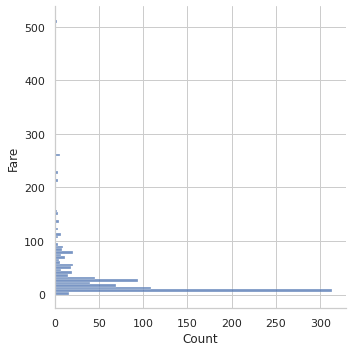

In [38]:
#visualizing the different Fare amount each passenger on the titanic pays
ax = sns.displot(y = df_train['Fare'], data = df_train)

In [39]:
#counting how many different Fare values were paid on the titanic
df_train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [40]:
#adding the Fare column to the subset dataframes
df_bin['Fare'] = pd.cut(df_train['Fare'], bins = 5) #since Fare is a float, it has been cut into bins
df_cont['Fare'] = df_train['Fare']

In [41]:
#counting the different Cabins passengers on the titanic stayed in
df_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
B86            1
A32            1
B50            1
C70            1
C91            1
Name: Cabin, Length: 147, dtype: int64

In [42]:
#recall, the Cabin attribute has over 600 missing values
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [43]:
#the Cabin column will not be used because it does not add any relevant information and it contains too many null values

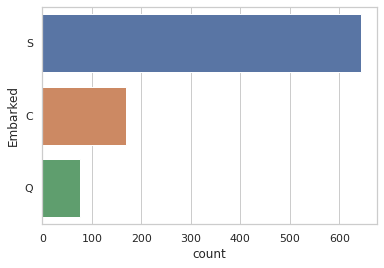

In [44]:
#visualizing the different locations (C, Q, S) passengers Embarked from on the titanic
ax = sns.countplot(y = df_train['Embarked'], data = df_train)

In [45]:
#counting the different locations passengers Embarked from on the titanic 
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
#recall, the Embarked attribute has 2 missing values
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [47]:
#we decide to fill the two missing Embarked values with the most commonly occuring value in this column, which is S
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [48]:
#we ensure that Embarked no longer has any missing values
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

In [49]:
#adding the Embarked column to the subset dataframes
df_bin['Embarked'] = df_train['Embarked']
df_cont['Embarked'] = df_train['Embarked']

In [50]:
#defining a function that will plot the relationship between input features and the Survived feature

def plotter(array, cols): #only accepts one-dimensional arrays 
  n_rows = 1
  n_cols = cols #change this value based on length of array

  fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2))

  for r in range(0, n_rows):
    for c in range(0,n_cols):
      if (r * c != 2):
        i = r*n_cols + c
        axis = axs[c]
        ax_final = sns.countplot(x = df_train[array[i]], hue = df_train['Survived'], ax = axis, data = df_train)
        axis.set_title(array[i])
        axis.legend(title = 'Survived', loc = 'upper right')

  plt.tight_layout()

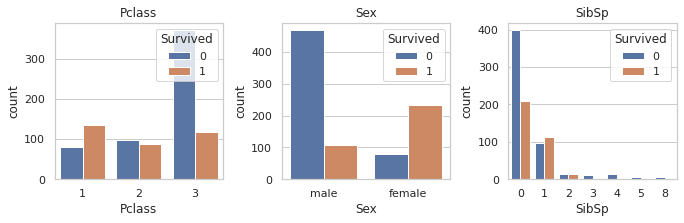

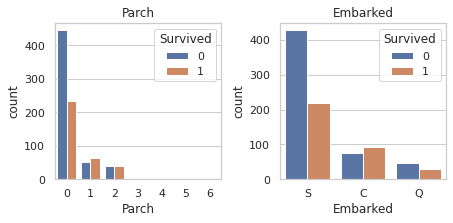

In [51]:
#visualizing the relationship between Pclass, Sex, SibSp, Parch, and Embarked and Survived
columns1 = ['Pclass', 'Sex', 'SibSp']
columns2 = ['Parch', 'Embarked']
plotter(columns1, 3)
plotter(columns2, 2)

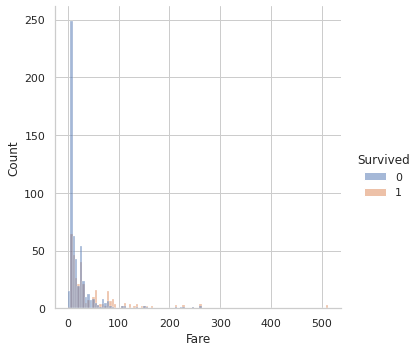

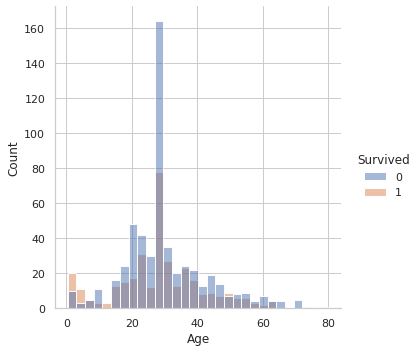

In [52]:
#visualizing the relationship between Fare, Age and Survived
ax = sns.displot(x = df_train['Fare'], hue = df_train['Survived'], data = df_train)
ax1 = sns.displot(x = df_train['Age'], hue = df_train['Survived'], data = df_train)

In [53]:
#viewing the training dataset
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [54]:
#viewing the final binned dataframe
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,1,38.0,1,0,"(-0.512, 102.466]",C
2,1,3,1,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,1,35.0,1,0,"(-0.512, 102.466]",S
4,0,3,0,35.0,0,0,"(-0.512, 102.466]",S


In [55]:
#viewing the final continuous dataframe
df_cont.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
#one-hot encoding the binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_encoded = pd.get_dummies(df_bin, columns = one_hot_cols)
df_bin_encoded.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_14.0,Age_14.5,Age_15.0,Age_16.0,Age_17.0,Age_18.0,Age_19.0,Age_20.0,Age_20.5,Age_21.0,Age_22.0,Age_23.0,Age_23.5,Age_24.0,Age_24.5,Age_25.0,...,Age_55.0,Age_55.5,Age_56.0,Age_57.0,Age_58.0,Age_59.0,Age_60.0,Age_61.0,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [57]:
#one-hot encoding the categorical columns in the continuous dataframe
#we will be using pandas get_dummies function rather than OneHotEncoder because there are relatively few features to encode
embarked_one_hot = pd.get_dummies(df_cont['Embarked'], prefix = 'Embarked')
sex_one_hot = pd.get_dummies(df_cont['Sex'], prefix = 'Sex')
pclass_one_hot = pd.get_dummies(df_cont['Pclass'], prefix = 'Pclass')

df_cont_encoded = pd.concat([df_cont, embarked_one_hot, sex_one_hot, pclass_one_hot], axis = 1)

df_cont_encoded = df_cont_encoded.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)

In [58]:
#viewing the final continuous dataframe with one hot encoding
df_cont_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [59]:
#we will now build the ML models

In [60]:
#selecting the dataframe we would like to use for predictions
selected_dataframe = df_cont_encoded

In [61]:
#viewing our selected dataframe
selected_dataframe.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [62]:
#splitting the selected dataframe into labels and data
X_train = selected_dataframe.drop('Survived', axis = 1)
Y_train = selected_dataframe['Survived']

In [63]:
#viewing the data without labels
X_train.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [64]:
#viewing the labels
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [65]:
#defining a function that will fit a ML algorithm passed in from the sci-kit learn library and return the accuracy of this model
def fit_ml_algorithm(algorithm, X_train, Y_train, cv): #this function takes in a specified algorithm, some data, some labels, and number of times to cross-validate
  model = algorithm.fit(X_train, Y_train)
  accuracy  = round(model.score(X_train, Y_train) * 100, 2)

  #cross-validation
  train_prediction = model_selection.cross_val_predict(algorithm, X_train, Y_train, cv = cv, n_jobs = -1)

  #cross validation accuracy
  accuracy_cv = round(metrics.accuracy_score(Y_train, train_prediction) * 100, 2)

  return train_prediction, accuracy, accuracy_cv

In [66]:
#logistic regression
start_time = time.time()
train_prediction_logistic_regression, accuracy_logistic_regression, accuracy_cv_logistic_regression = fit_ml_algorithm(LogisticRegression(max_iter=1000), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % accuracy_logistic_regression)
print("Accuracy CV 10-Fold: %s" % accuracy_cv_logistic_regression)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.58
Accuracy CV 10-Fold: 79.91
Running Time: 0:00:02.158785


In [67]:
#k-nearest-neighbors
start_time = time.time()
train_prediction_knn, accuracy_knn, accuracy_cv_knn = fit_ml_algorithm(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % accuracy_knn)
print("Accuracy CV 10-Fold: %s" % accuracy_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.15
Accuracy CV 10-Fold: 71.72
Running Time: 0:00:00.133340


In [68]:
#gaussian naive bayes
start_time = time.time()
train_prediction_gaussian_nb, accuracy_gaussian_nb, accuracy_cv_gaussian_nb = fit_ml_algorithm(GaussianNB(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
gaussian_nb_time = (time.time() - start_time)
print("Accuracy: %s" % accuracy_gaussian_nb)
print("Accuracy CV 10-Fold: %s" % accuracy_cv_gaussian_nb)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_nb_time))

Accuracy: 78.68
Accuracy CV 10-Fold: 78.56
Running Time: 0:00:00.060433


In [69]:
#decision tree classifier
start_time = time.time()
train_prediction_decision_tree, accuracy_decision_tree, accuracy_cv_decision_tree = fit_ml_algorithm(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
decision_tree_time = (time.time() - start_time)
print("Accuracy: %s" % accuracy_decision_tree)
print("Accuracy CV 10-Fold: %s" % accuracy_cv_decision_tree)
print("Running Time: %s" % datetime.timedelta(seconds=decision_tree_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 79.12
Running Time: 0:00:00.085930


In [70]:
#compiling all the accuracy scores 
models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree'], 
                       'Score': [accuracy_logistic_regression, accuracy_knn, accuracy_gaussian_nb, accuracy_decision_tree]})
print('Regular Accuracy Scores')
models.sort_values(by = 'Score', ascending = False)

Regular Accuracy Scores


,Model,Score
3,Decision Tree,97.98
1,KNN,82.15
0,Logistic Regression,80.58
2,Gaussian Naive Bayes,78.68


In [71]:
#compiling all the cross validation accuracy scores 
models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree'], 
                       'Score': [accuracy_cv_logistic_regression, accuracy_cv_knn, accuracy_cv_gaussian_nb, accuracy_cv_decision_tree]})
print('Cross Validation Accuracy Scores')
models.sort_values(by = 'Score', ascending = False)

Cross Validation Accuracy Scores


,Model,Score
0,Logistic Regression,79.91
3,Decision Tree,79.12
2,Gaussian Naive Bayes,78.56
1,KNN,71.72


In [72]:
#we now prepare the dataset for submission

In [73]:
#the test dataframe must take the same form as the X_train dataset
X_train.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [75]:
#viewing the test dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#one hot encoding the features in the test dataset to mimic the X_train dataset
